In [ ]:
#!pip install textblob
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv( r'/content/data_cleaned.csv')                     #'Data/vaccination_tweets.csv'

# data preprocessing

In [ ]:
df.head()

,Unnamed:,label,cleaned_text
0,799999,1,love healthuandpets u guy r best
1,800000,1,im meting one besties tonight cant wait girl talk
2,800001,1,darealsunisakim thanks twiter ad sunisa got me...
3,800002,1,sick realy cheap hurt much eat real fod plus f...
4,800003,1,lovesbroklyn efect everyone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17683 entries, 0 to 17682
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed:      17683 non-null  int64 
 1   label         17683 non-null  int64 
 2   cleaned_text  17682 non-null  object
dtypes: int64(2), object(1)
memory usage: 414.6+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed:,0
label,0
cleaned_text,1


In [ ]:
df.columns

Index(['Unnamed:', 'label', 'cleaned_text'], dtype='object')

#cleand data using stemmer

In [ ]:
stemmer = PorterStemmer()

def stemming(data):
    if isinstance(data,str):
        text=[]
        for word in data.split():
            text.append(stemmer.stem(word))
        text=''.join(text)
    return data



In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,Unnamed:,label,cleaned_text
0,799999,1,love healthuandpets u guy r best
1,800000,1,im meting one besties tonight cant wait girl talk
2,800001,1,darealsunisakim thanks twiter ad sunisa got me...
3,800002,1,sick realy cheap hurt much eat real fod plus f...
4,800003,1,lovesbroklyn efect everyone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17683 entries, 0 to 17682
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed:      17683 non-null  int64 
 1   label         17683 non-null  int64 
 2   cleaned_text  17682 non-null  object
dtypes: int64(2), object(1)
memory usage: 414.6+ KB


In [ ]:
df['cleaned_text'] = df['cleaned_text'].fillna('')

<h> polarity arrange </h>

In [ ]:
from textblob import TextBlob

def polarity(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return None

In [ ]:
df['polarity'] = df['cleaned_text'].apply(polarity)

In [ ]:
df.head(10)

,Unnamed:,label,cleaned_text,polarity
0,799999,1,love healthuandpets u guy r best,0.750000
1,800000,1,im meting one besties tonight cant wait girl talk,0.000000
2,800001,1,darealsunisakim thanks twiter ad sunisa got me...,0.200000
3,800002,1,sick realy cheap hurt much eat real fod plus f...,0.021429
4,800003,1,lovesbroklyn efect everyone,0.000000
5,800004,1,productofear tel burst laughing realy loud tha...,0.150000
6,800005,1,rkeithil thans response ihad already find answer,0.000000
7,800006,1,kepinupwkris jealous hope great time vega like...,0.650000
8,800007,1,tomcfly ah congrats mr fletcher finaly joining...,0.000000
9,800008,1,evoip responded stupid cat helping type forgiv...,-0.800000


<h>splite data into 3 category
"Negative", "Neutral" , "Positive"</h1>


In [ ]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [ ]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [ ]:
df.head()

,Unnamed:,label,cleaned_text,polarity,sentiment
0,799999,1,love healthuandpets u guy r best,0.750000,Positive
1,800000,1,im meting one besties tonight cant wait girl talk,0.000000,Neutral
2,800001,1,darealsunisakim thanks twiter ad sunisa got me...,0.200000,Positive
3,800002,1,sick realy cheap hurt much eat real fod plus f...,0.021429,Positive
4,800003,1,lovesbroklyn efect everyone,0.000000,Neutral


# some analysis

<Axes: xlabel='sentiment'>

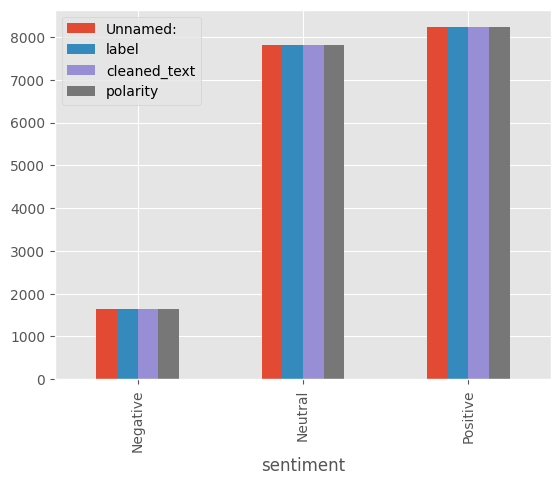

In [ ]:
df.groupby('sentiment').count().plot(kind='bar')

<Axes: xlabel='sentiment', ylabel='count'>

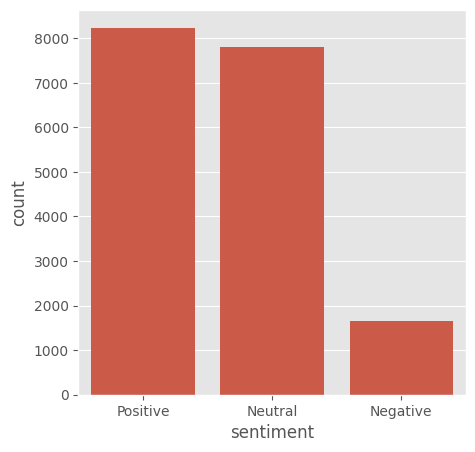

In [ ]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', data=df)

<Axes: >

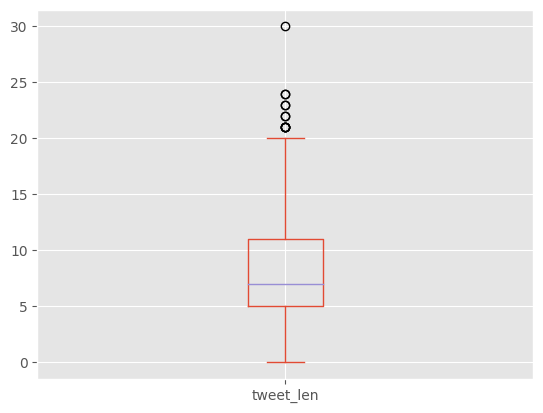

In [ ]:
df['tweet_len'] = df['cleaned_text'].str.split().str.len()
df['tweet_len'].plot(kind='box')

Text(0.5, 1.0, 'Distribution of sentiments')

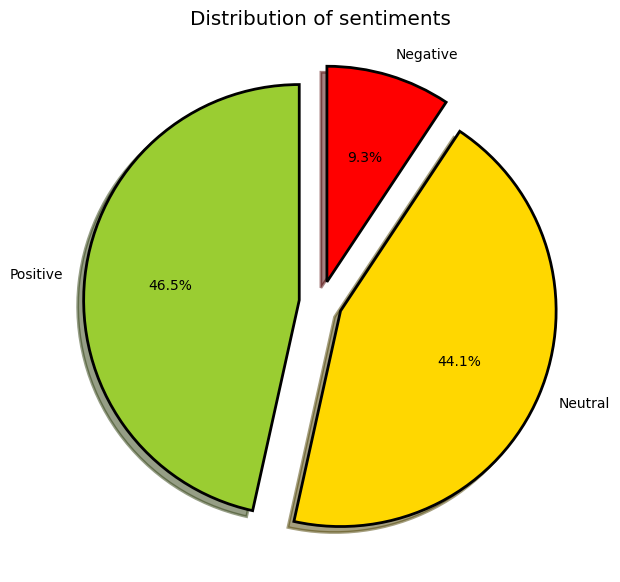

In [ ]:
fig = plt.figure(figsize=(7, 7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')

Text(0.5, 0.98, 'length for Positive sentiment tweets.')

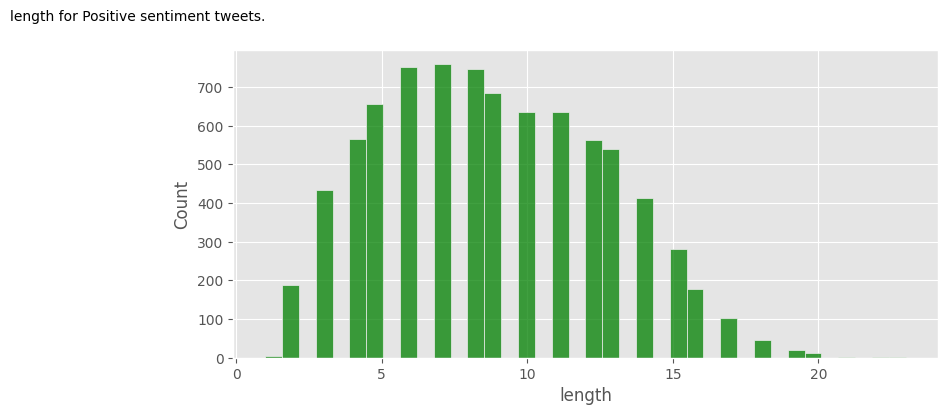

In [ ]:
fig = plt.figure(figsize=(20,4))
df['length'] = df.cleaned_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Positive']['length'], ax=ax1,color='green')
fig.suptitle('length for Positive sentiment tweets.', fontsize=10)

Text(0.5, 0.98, 'length for Negative sentiment tweets.')

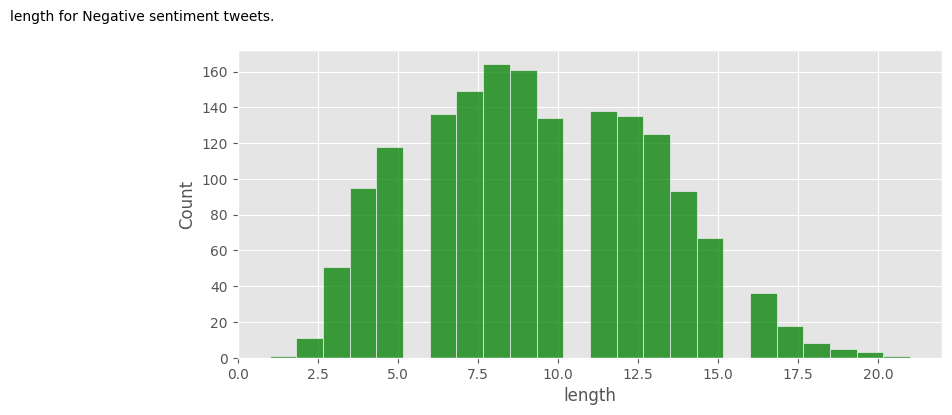

In [ ]:
fig = plt.figure(figsize=(20,4))
df['length'] = df.cleaned_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Negative']['length'], ax=ax1,color='green')
fig.suptitle('length for Negative sentiment tweets.', fontsize=10)

In [ ]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment,tweet_len,length
13444,813443,1,nkotbfan thats awesome im bsb fan,1.0,Positive,6,6
14036,814035,1,marcapitman best spech henry v branagh rocked ...,1.0,Positive,8,8
5055,805054,1,spreadingjoy god morning wonderful day,1.0,Positive,5,5
5038,805037,1,karenbirch thank thank thank best parcel ever x,1.0,Positive,8,8
5003,805002,1,ive playing sqlite think it awesome,1.0,Positive,6,6


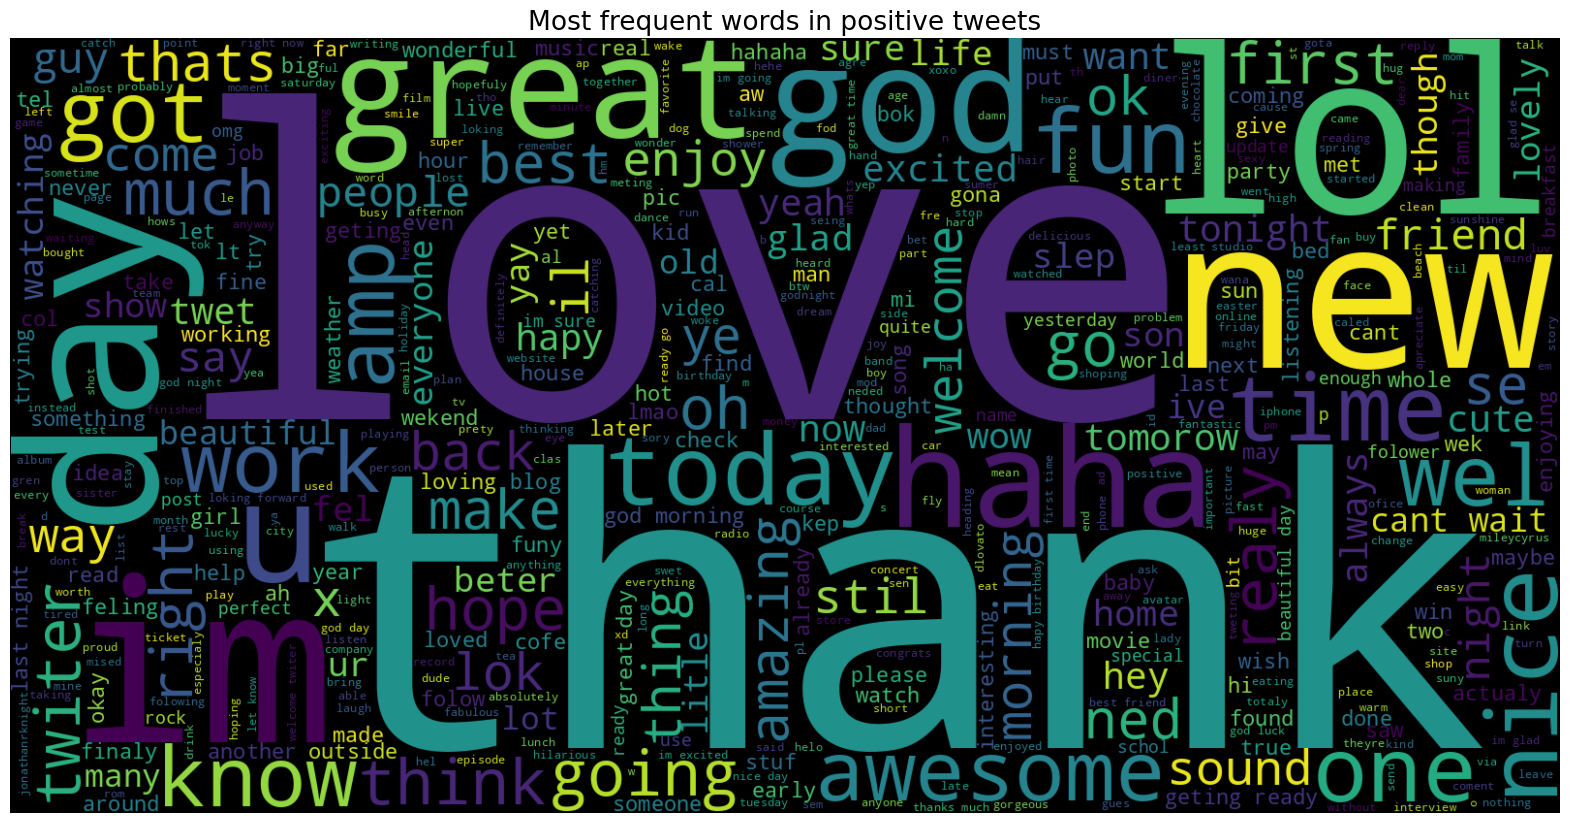

In [ ]:
text = ' '.join([word for word in pos_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment,tweet_len,length
8143,808142,1,wow wek major milestone end almost sight time ...,-0.001042,Negative,12,12
5185,805184,1,big article rahul gandhi mphil fake first page...,-0.002727,Negative,14,14
384,800383,1,new background exactly work wanted bored old one,-0.003409,Negative,8,8
13812,813811,1,debgraper thanks deb even get sick stil love a...,-0.004762,Negative,9,9
3237,803236,1,aprilfmay haha id love that r bal gear sick ge...,-0.004762,Negative,14,14


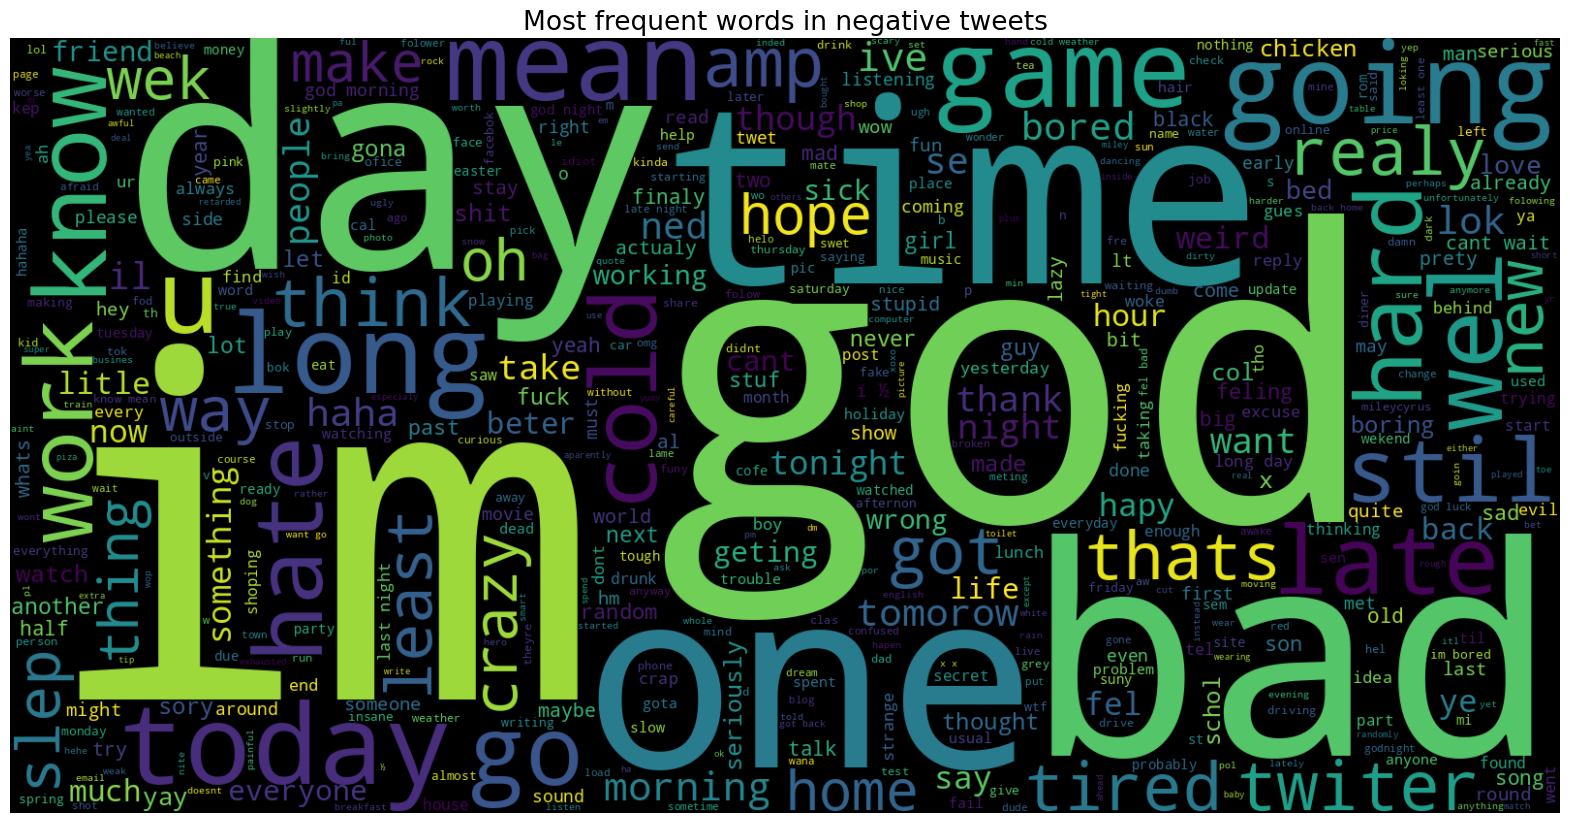

In [ ]:
text = ' '.join([word for word in neg_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

,Unnamed:,label,cleaned_text,polarity,sentiment,tweet_len,length
1,800000,1,im meting one besties tonight cant wait girl talk,0.0,Neutral,9,9
11609,811608,1,shruticute yeah junior artist th std surya rol...,0.0,Neutral,12,12
11675,811674,1,kelvinphotos wories husband sirwobin poker nig...,0.0,Neutral,13,13
11673,811672,1,alysagruber thx always brightens day,0.0,Neutral,5,5
11670,811669,1,thinking omg day weding ah hen wkend wkend sto...,0.0,Neutral,12,12


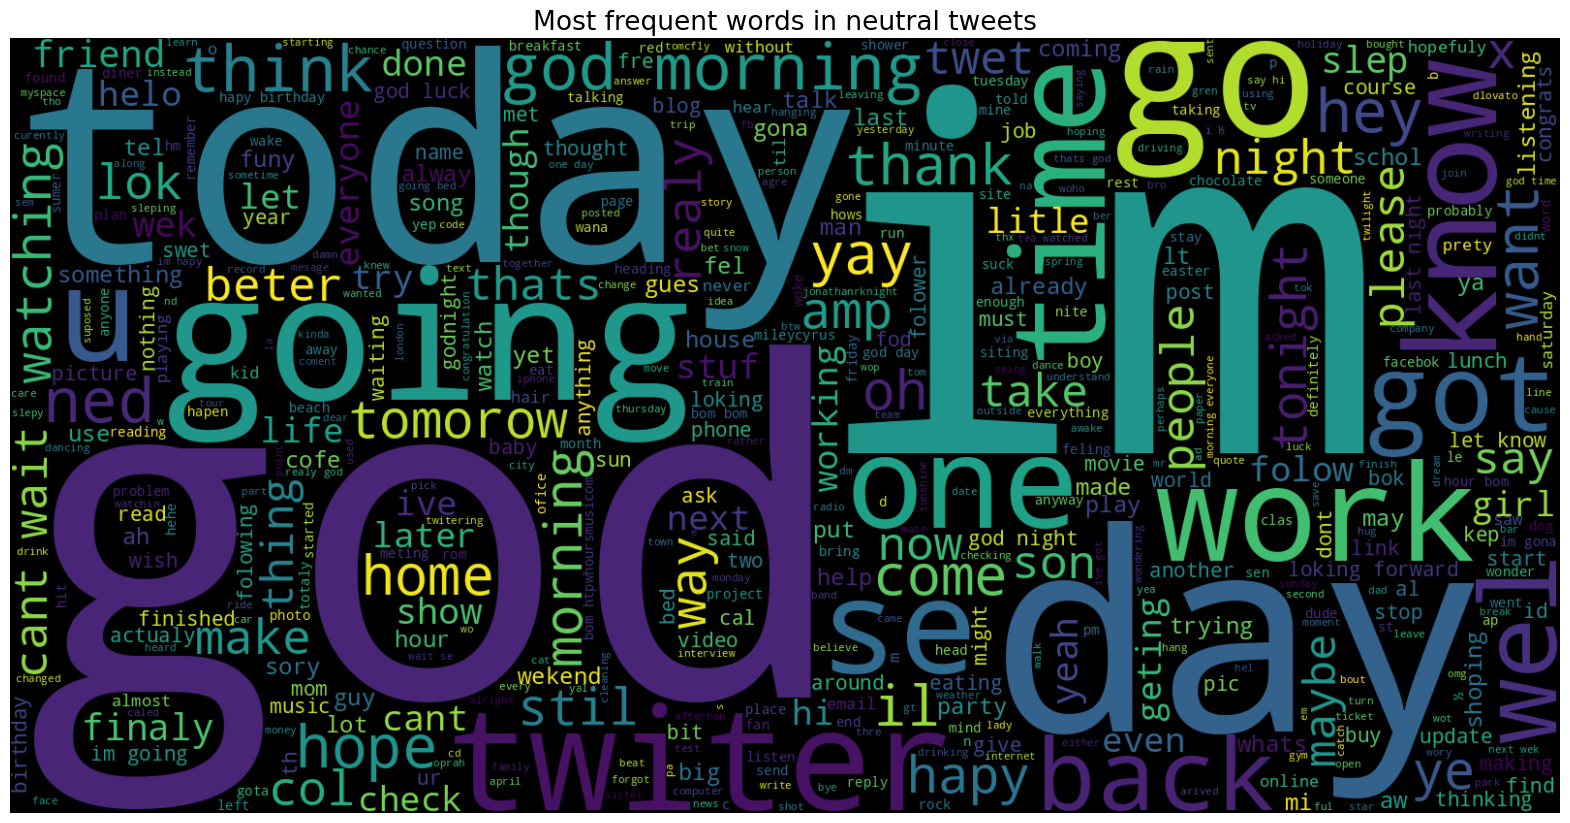

In [ ]:
text = ' '.join([word for word in neutral_tweets['cleaned_text']])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(df['cleaned_text'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 125117

First 20 features:
 ['ab' 'ab amazing' 'ab clas' 'ab minimum' 'ab motivation' 'ab watching'
 'ababyblueyes' 'ababyblueyes may' 'abacab' 'abacab yepof' 'abandoned'
 'abandoned twiter' 'abarkerwof' 'abarkerwof okay' 'abay' 'abay sa' 'abaz'
 'abaz thanks' 'abc' 'abc bobtob']


In [ ]:
X = df['cleaned_text']
Y = df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (14146, 125117)
Size of y_train: (14146,)
Size of x_test: (3537, 125117)
Size of y_test: (3537,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.16%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 159  146   38]
 [   4 1524   13]
 [   9  138 1506]]


              precision    recall  f1-score   support

    Negative       0.92      0.46      0.62       343
     Neutral       0.84      0.99      0.91      1541
    Positive       0.97      0.91      0.94      1653

    accuracy                           0.90      3537
   macro avg       0.91      0.79      0.82      3537
weighted avg       0.91      0.90      0.89      3537



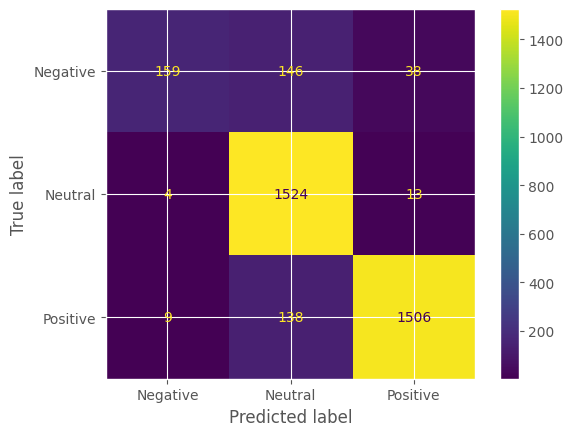

In [ ]:
confusionMatrix = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
show = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=logreg.classes_)
show.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,13]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 13]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 13}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.18%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 176  131   36]
 [   5 1525   11]
 [  11  118 1524]]


              precision    recall  f1-score   support

    Negative       0.92      0.51      0.66       343
     Neutral       0.86      0.99      0.92      1541
    Positive       0.97      0.92      0.95      1653

    accuracy                           0.91      3537
   macro avg       0.92      0.81      0.84      3537
weighted avg       0.92      0.91      0.91      3537



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 92.37%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 200  109   34]
 [   5 1526   10]
 [  10  102 1541]]


              precision    recall  f1-score   support

    Negative       0.93      0.58      0.72       343
     Neutral       0.88      0.99      0.93      1541
    Positive       0.97      0.93      0.95      1653

    accuracy                           0.92      3537
   macro avg       0.93      0.84      0.87      3537
weighted avg       0.93      0.92      0.92      3537



# save SVM model

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=10000)
# X_vectorized = vectorizer.fit_transform(X)



joblib.dump(SVCmodel, 'svm_model.pkl')
joblib.dump(SVCmodel, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

vectorizer = TfidfVectorizer()

# Save the vectorizer
with open(r'C:\Users\computec\Downloads\tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("TfidfVectorizer saved successfully!")


TfidfVectorizer saved successfully!


# hugging face transformer

In [ ]:
!pip install datasets


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00


# model tuning

# model train

In [ ]:
#!pip install --upgrade transformers torch safetensors


#  fine tuning

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd
import torch
from sklearn.metrics import precision_score, recall_score, f1_score



#20% for testing
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)



# check train data is string and integer
train_df['cleaned_text'] = train_df['cleaned_text'].astype(str)
eval_df['cleaned_text'] = eval_df['cleaned_text'].astype(str)

train_df['label'] = train_df['label'].astype(int)
eval_df['label'] = eval_df['label'].astype(int)

model_name = 'prajjwal1/bert-tiny'  # TinyBERT model for faster training
tokenizer = BertTokenizer.from_pretrained(model_name)




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
max_seq_length = 116
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)

def tokenize_function(examples):
    return tokenizer(
        examples['cleaned_text'],
        padding="max_length",
        truncation=True,
        max_length=max_seq_length,
        return_tensors="pt"
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
eval_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(train_df['label'].unique())) # Load BERT model

# evaluate accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    fp16=False,
    gradient_accumulation_steps=2,
    report_to=None
)



trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Check the batches
for batch in train_dataset:
    batch['input_ids'] = batch['input_ids'].contiguous()
    batch['attention_mask'] = batch['attention_mask'].contiguous()
    batch['label'] = batch['label'].contiguous()

trainer.train()


Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


ValueError: You are trying to save a non contiguous tensor: `bert.encoder.layer.0.attention.self.query.weight` which is not allowed. It either means you are trying to save tensors which are reference of each other in which case it's recommended to save only the full tensors, and reslice at load time, or simply call `.contiguous()` on your tensor to pack it before saving.

#


# evaluate model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
predictions = trainer.predict(eval_dataset)
pred_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1)

eval_df['true_sentiment'] = eval_df['label']
eval_df['transformer_sentiment'] = pred_labels

#precision
precision = precision_score(eval_df['true_sentiment'], eval_df['transformer_sentiment'], average='weighted')
print(f'Precision: {precision:.2f}')

# recall
recall = recall_score(eval_df['true_sentiment'], eval_df['transformer_sentiment'], average='weighted')
print(f'Recall: {recall:.2f}')

#F1-score
f1 = f1_score(eval_df['true_sentiment'], eval_df['transformer_sentiment'], average='weighted')
print(f'F1 Score: {f1:.2f}')

Epoch,Training Loss,Validation Loss


Precision: 0.70
Recall: 0.70
F1 Score: 0.70


# model save

In [ ]:
model_save_path = './model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)


In [ ]:
print(f"Model and tokenizer saved to {model_save_path}.")